In [1]:
import os
import sys
import numpy as np
import pandas as pd
sys.path.append(os.path.join('..', 'spot_calling'))
from utils import load_prep_slide

import liana as li

data_dir = os.path.join('..' ,'..', 'data', 'heart_visium')

In [2]:
# Rename to more informative names
# full_names = {'Adipo': 'Adipocyte',
#               'CM': 'Cardiomyocyte',
#               'Endo': 'Endothelial',
#               'Fib': 'Fibroblast',
#               'PC': 'Pericyte',
#               'prolif': 'Proliferating',
#               'vSMCs': 'Vascular_SMCs',
#               }

exact_abbreviations = {
    'Adipo': 'AD',
    'CM': 'CM',
    'Endo': 'EN',
    'Fib': 'FB',
    'PC': 'PC',
    'prolif': 'PR',
    'vSMCs': 'VM',
    'Neuronal': 'NE',
    'Myeloid': 'MY',
    'Mast': 'MA',
    'Lymphoid': 'LY'
}

In [3]:
metadata = pd.read_csv(os.path.join("..", "spot_calling", "visium_meta.csv"))

In [4]:
target_metrics = {}
interactions = {}

In [5]:
# scan names of all datasets
dataset_names = [f for f in metadata.slide_name]

In [6]:
for dataset in dataset_names:
    print(f"Processing {dataset}")
    
    adata = load_prep_slide(path=data_dir, slide=dataset + '.h5ad', bandwidth=150, set_diag=False, cutoff=0.1)
    # but only for the ones that are in the data
    adata.obsm['compositions'].columns = [exact_abbreviations.get(c, c) for c in adata.obsm['compositions'].columns]
    
    comps = li.ut.obsm_to_adata(adata, 'compositions')
    comps = comps[:, comps.var.index!='Proliferating'].copy() # exclude proliferating

    misty = li.mt.MistyData({"intra": comps, "inter": comps})
    misty(model='linear', verbose=True, bypass_intra=True)
    
    interactions[dataset] = misty.uns['interactions'].copy()
    interactions[dataset]['sample'] = dataset
    target_metrics[dataset] = misty.uns['target_metrics'].copy()
    target_metrics[dataset]['sample'] = dataset

Processing AKK001_157785


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]


Processing AKK002_157779


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 11.88it/s]


Processing AKK002_157781


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 23.30it/s]


Processing AKK002_157782


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 33.29it/s]


Processing AKK003_157775


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 29.81it/s]


Processing AKK003_157777


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 32.52it/s]


Processing AKK004_157772


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 29.68it/s]


Processing AKK006_157771


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 29.41it/s]


Processing Visium_1_CK279


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 35.62it/s]


Processing Visium_10_CK288


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 31.40it/s]


Processing Visium_11_CK289


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 36.57it/s]


Processing Visium_12_CK290


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 33.39it/s]


Processing Visium_13_CK291


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 35.52it/s]


Processing Visium_14_CK292


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 33.54it/s]


Processing Visium_15_CK293


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 35.15it/s]


Processing Visium_16_CK294


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 31.20it/s]


Processing Visium_17_CK295


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 32.47it/s]


Processing Visium_18_CK296


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 32.19it/s]


Processing Visium_19_CK297


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 29.76it/s]


Processing Visium_2_CK280


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 34.62it/s]


Processing Visium_20_CK298


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 31.08it/s]


Processing Visium_3_CK281


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 33.79it/s]


Processing Visium_4_CK282


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 36.00it/s]


Processing Visium_5_CK283


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 32.13it/s]


Processing Visium_6_CK284


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 31.60it/s]


Processing Visium_7_CK285


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 31.82it/s]


Processing Visium_8_CK286


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 37.56it/s]


Processing Visium_9_CK287


/home/dbdimitrov/.local/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
view intra is not a csr_matrix. Converting to csr_matrix
Now learning: VM: 100%|██████████| 11/11 [00:00<00:00, 28.94it/s]


In [7]:
interactions = pd.concat(interactions, ignore_index=True)
interactions = interactions.merge(metadata, left_on='sample', right_on='slide_name')

In [8]:
target_metrics = pd.concat(target_metrics, ignore_index=True)
target_metrics = target_metrics.merge(metadata, left_on='sample', right_on='slide_name')

In [9]:
tm_ctrl = target_metrics[target_metrics['major_labl']=='CTRL'].copy()
tm_iz = target_metrics[target_metrics['major_labl']=='IZ'].copy()
tm_rz = target_metrics[~target_metrics['major_labl'].isin(['CTRL', 'IZ'])].copy()


### keep targets with median gain_R2 > 0.05

In [10]:
targets = target_metrics.groupby(['target']).agg({'gain_R2': 'median'}).reset_index()
targets = targets[targets['gain_R2'] > 0.05]['target'].values

In [11]:
# keep only interactions with median importance > 1.645
ints = interactions.groupby(['target', 'predictor']).agg({'importances': 'median'}).reset_index()

In [12]:
ints['keep'] = ints['importances'] > 1.645
ints['keep'] = ints['keep'] & ints['target'].isin(targets) & ints['predictor'].isin(targets)

In [13]:
# if keep then x else np.nan
ints['label'] = np.where(ints['keep'], 'X', '')

In [14]:
ints.to_csv(os.path.join('results', 'ct_interactions.csv'))

In [15]:
cell_pairs =ints[ints['keep']][['target', 'predictor']]

# join the same but with predictor and target swapped
cell_pairs2 = cell_pairs.copy().rename(columns={'target': 'predictor', 'predictor': 'target'})
interactions = pd.concat([cell_pairs, cell_pairs2], axis=0)

# same to same
autocrine = list(np.union1d(interactions['target'].unique(), interactions['predictor'].unique()))
autocrine = pd.DataFrame(zip(autocrine, autocrine), columns=['target', 'predictor'])

cell_pairs = pd.concat([interactions, autocrine], axis=0)
cell_pairs = cell_pairs.rename(columns={'predictor': 'source'})[['source', 'target']]

cell_pairs.to_csv(os.path.join('results', 'cell_pairs.csv'), index=False)

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_network(cell_pairs,
                 score_key,
                 top_n=20, 
                 figsize=(7, 7),
                 network_layout='kamada_kawai', 
                 edge_alpha=0.5, 
                 edge_arrow_size=10,
                 edge_width_factor=1,
                 edge_color='Blues',
                 node_color='skyblue', 
                 node_size=350, 
                 node_alpha=0.9, 
                 node_label_alpha=0.8,
                 node_label_size=9, 
                 node_label_offset=[0.0, 0.15], 
                 title_size=14, 
                 centralize_nodes=None, 
                 source_key='source',
                 target_key='target',
                 filename=None,
                 show_colorbar=False,
                 scale_weights=True,
                 **kwargs,
                 ):
    
    fig, ax = plt.subplots(figsize=figsize)
    
    cp = cell_pairs.copy()
    if scale_weights:
        cp[score_key] = (cp[score_key] - cp[score_key].min()) / (cp[score_key].max() - cp[score_key].min()) + 1
    cp = cp.sort_values(score_key, ascending=False).head(top_n)
    
    cp[source_key] = cp[source_key].astype('category')
    cp[target_key] = cp[target_key].astype('category')

    G = nx.from_pandas_edgelist(cp, source=source_key, target=target_key, edge_attr=score_key, create_using=nx.DiGraph())

    # Determine layout
    if network_layout == 'spring':
        pos = nx.spring_layout(G, **kwargs)
    elif network_layout == 'circular':
        pos = nx.circular_layout(G, **kwargs)
    elif network_layout == 'spectral':
        pos = nx.spectral_layout(G, **kwargs)
    elif network_layout == 'kamada_kawai':
        pos = nx.kamada_kawai_layout(G, **kwargs)
    else:
        raise ValueError("network_layout should be either 'spring' or 'circular'")
    
    # Adjust positions if centralization is needed
    if centralize_nodes in ['source', 'target']:
        selected_nodes = cp[centralize_nodes].unique()
        for node in selected_nodes:
            pos[node] = np.mean([pos[n] for n in selected_nodes], axis=0) + np.random.rand(2) * 0.5

    # Scale the edge weights
    edge_weights = np.array([G[u][v][score_key] for u, v in G.edges()]) * edge_width_factor

    # Create a colormap
    cmap = plt.cm.get_cmap(edge_color)
    
    # Draw network with directed edges
    nx.draw_networkx_edges(G, pos, alpha=edge_alpha, arrows=True, arrowsize=edge_arrow_size, width=edge_weights,
                           edge_color=edge_weights, edge_cmap=cmap, ax=ax, #connectionstyle="arc3,rad=-0.25",
                           edge_vmax=cp[score_key].max(), edge_vmin=cp[score_key].min())
    nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size, alpha=node_alpha, ax=ax)

    label_options = {"ec": "k", "fc": "white", "alpha": node_label_alpha}
    nx.draw_networkx_labels(G, {k: v + np.array(node_label_offset) for k, v in pos.items()},
                            font_size=node_label_size, bbox=label_options, ax=ax)

    # Adjust axis limits
    ax.set_frame_on(False)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    coeff = 1.4 # NOTE
    ax.set_xlim((xlim[0] * coeff, xlim[1] * coeff))
    ax.set_ylim((ylim[0] * coeff, ylim[1] * coeff))
    ax.set_title(score_key, fontsize=title_size, fontweight='bold')

    if show_colorbar:
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=edge_weights.min(), vmax=edge_weights.max()))
        plt.colorbar(sm, ax=ax, label='Edge Weight', shrink=0.8)

    plt.tight_layout()
    plt.title("")    
    
    if filename is not None:
        plt.savefig(filename, dpi=200, bbox_inches='tight')
    else:
        plt.show()
    
    return fig, ax

/tmp/ipykernel_773917/2870416136.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


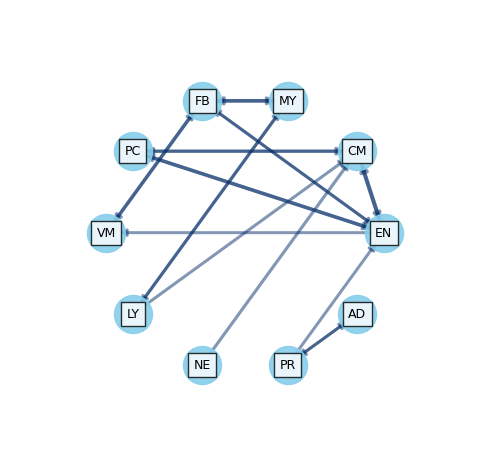

(<Figure size 500x500 with 1 Axes>, <Axes: >)

In [17]:
plot_network(ints,
             source_key='predictor', 
             score_key='importances', 
             node_size=750, 
             figsize=(5, 5),
             node_label_offset=[0,0],
             edge_width_factor=1.5,
             network_layout='circular'
             )